In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

crime=pd.read_csv('database.csv')

/var/folders/23/v45vdf3j7791ws_6xl_8l1hw0000gn/T/ipykernel_46454/921006035.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime=pd.read_csv('database.csv')


# Data Exploration

In [133]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [134]:
crime.duplicated().sum()

0

In [135]:
crime.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [136]:
crime.sample(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
422677,422678,ILCPD00,Chicago,Municipal Police,Cook,Illinois,2001,July,17,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
132020,132021,MOSPD00,St. Louis,Municipal Police,St. Louis city,Missouri,1986,January,2,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Stranger,Knife,0,0,FBI
45033,45034,AZ00705,Chandler,Municipal Police,Maricopa,Arizona,1982,October,1,Murder or Manslaughter,...,Not Hispanic,Male,33,White,Hispanic,Stranger,Handgun,1,0,FBI
586087,586088,LANPD00,New Orleans,Municipal Police,Orleans,Louisiana,2011,March,15,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
369482,369483,TX10100,Harris,Sheriff,Harris,Texas,1997,December,2,Murder or Manslaughter,...,Hispanic,Male,28,White,Hispanic,Stranger,Handgun,0,0,FBI
551430,551431,CA03609,Rialto,Municipal Police,San Bernardino,California,2009,June,3,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI
513446,513447,TN08304,Hendersonville,Municipal Police,Sumner,Tennessee,2006,April,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Handgun,0,0,FBI
141279,141280,AL00301,Montgomery,Municipal Police,Montgomery,Alabama,1987,April,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
362512,362513,MD01721,Prince George's County,County Police,Prince George's,Maryland,1997,July,3,Murder or Manslaughter,...,Unknown,Male,18,Black,Unknown,Acquaintance,Handgun,0,0,FBI
430957,430958,TX10808,Mcallen,Municipal Police,Hidalgo,Texas,2001,December,1,Murder or Manslaughter,...,Hispanic,Male,23,White,Hispanic,Wife,Handgun,0,0,FBI


In [137]:
crime.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [138]:
crime["Perpetrator Age"].unique()

array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

In [139]:
crime["Crime Type"].value_counts()

Crime Type
Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: count, dtype: int64

In [140]:
crime["Victim Race"].value_counts()

Victim Race
White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: count, dtype: int64

In [141]:
crime["Crime Solved"].value_counts()

Crime Solved
Yes    448172
No     190282
Name: count, dtype: int64

In [142]:
crime["Perpetrator Race"].value_counts()

Perpetrator Race
White                            218243
Black                            214516
Unknown                          196047
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: count, dtype: int64

In [143]:
crime["Perpetrator Sex"].value_counts()

Perpetrator Sex
Male       399541
Unknown    190365
Female      48548
Name: count, dtype: int64

In [144]:
crime["Victim Sex"].value_counts()

Victim Sex
Male       494125
Female     143345
Unknown       984
Name: count, dtype: int64

In [145]:
crime["Victim Age"].value_counts()

Victim Age
22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: count, Length: 101, dtype: int64

In [146]:
crime["Weapon"].value_counts()

Weapon
Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: count, dtype: int64

# Explanatory Plots

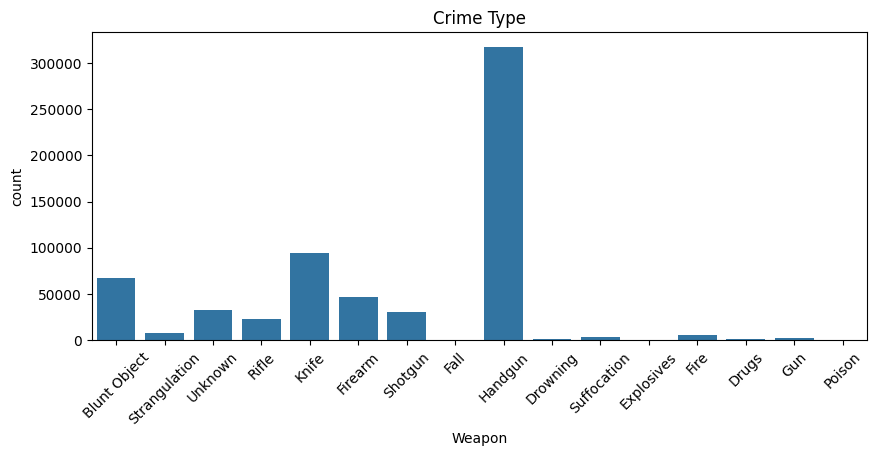

In [147]:
plt.figure(figsize=(10,4))
sns.countplot(data=crime, x="Weapon" )
plt.xticks(rotation=45)
plt.title('Weapon Used')
plt.title('Crime Type')
plt.show()

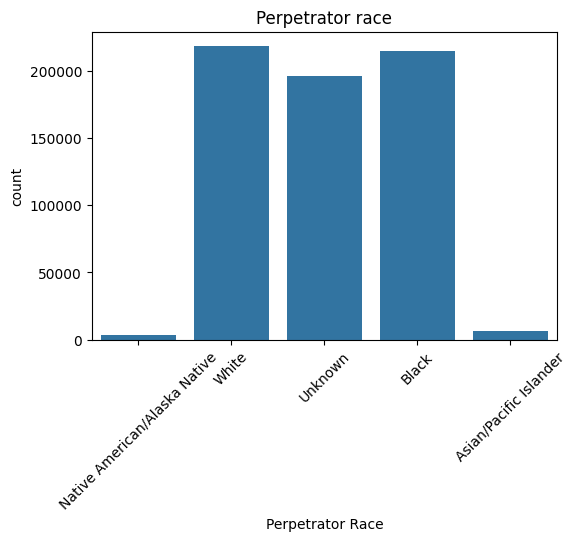

In [149]:
plt.figure(figsize=(6,4))
sns.countplot(data=crime, x="Perpetrator Race")
plt.xticks(rotation=45)
plt.title("Perpetrator race")
plt.show()

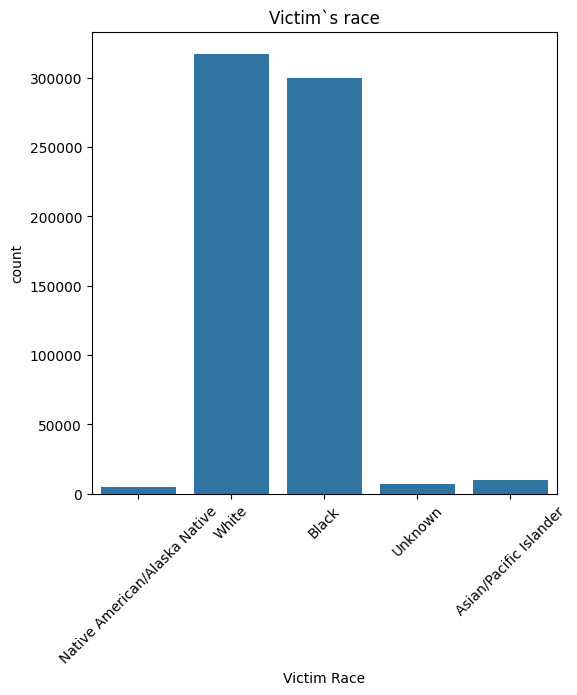

In [150]:
plt.figure(figsize=(6,6))
sns.countplot(data=crime, x="Victim Race")
plt.xticks(rotation=45)
plt.title("Victim`s race")
plt.show()

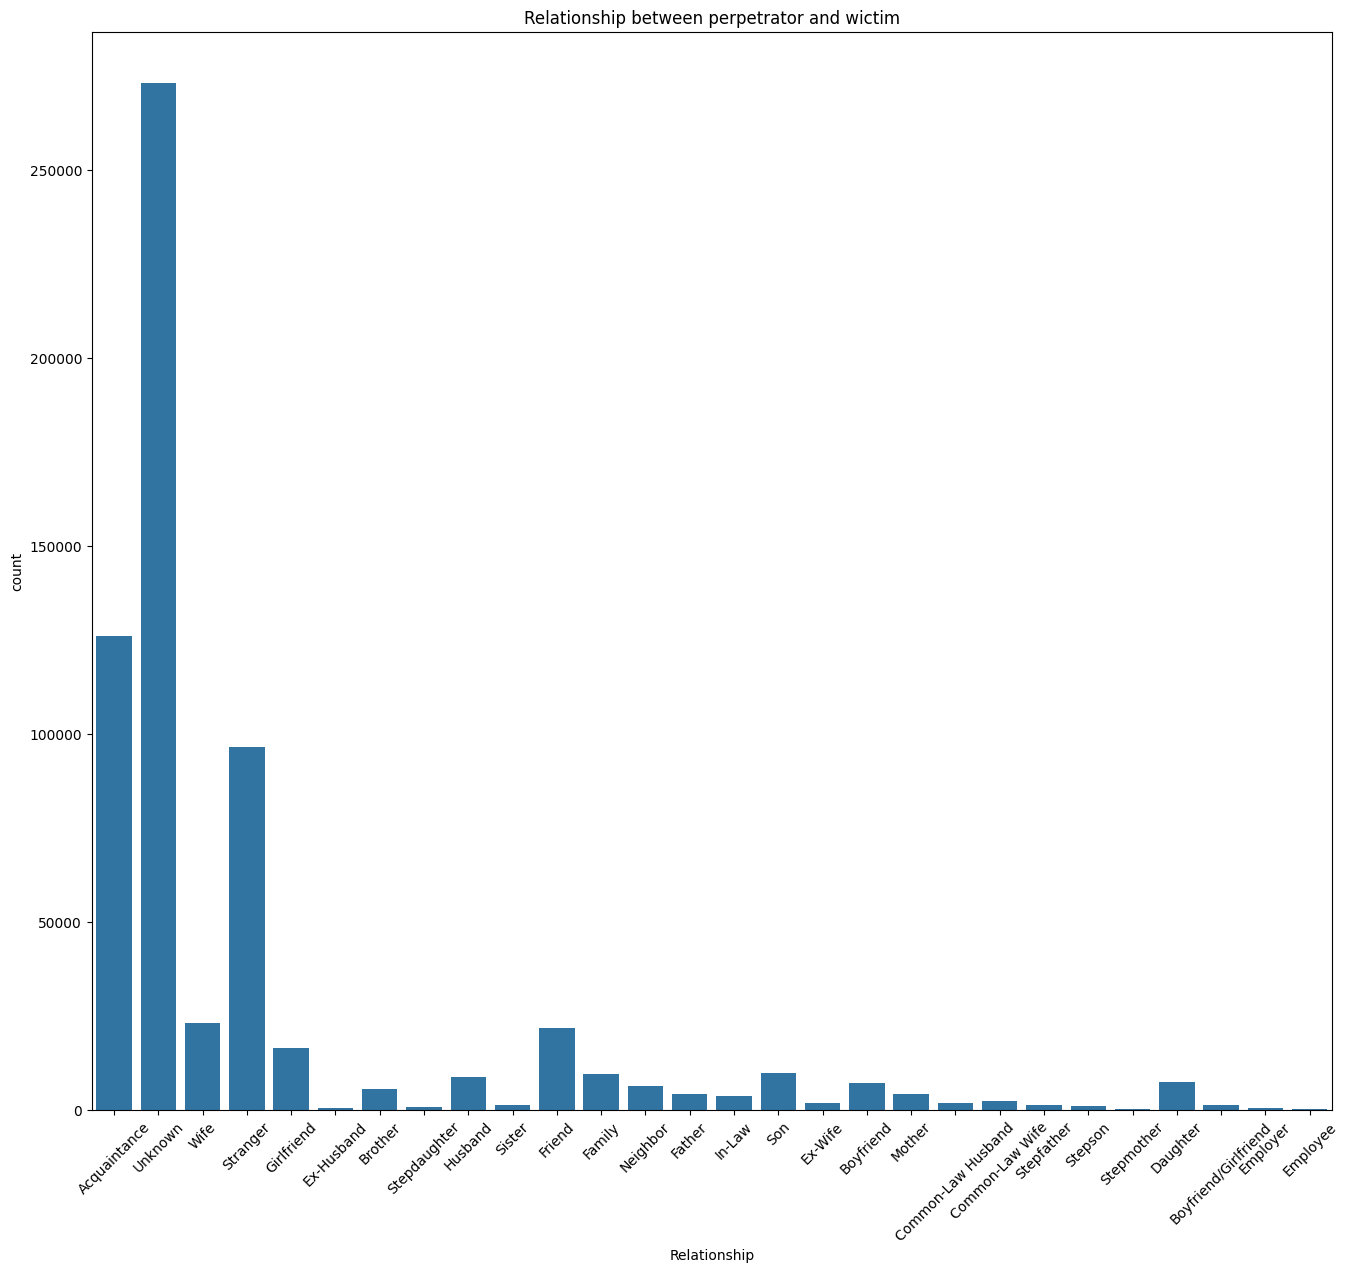

In [151]:
plt.figure(figsize=(16,14))
sns.countplot(data=crime, x="Relationship")
plt.xticks(rotation=45)
plt.title("Relationship between perpetrator and wictim")
plt.show()

In [152]:
crime["Incident"].value_counts()


Incident
1      265528
2       71779
3       39236
4       27113
5       20658
        ...  
973        16
974        16
975        16
976        16
977        16
Name: count, Length: 1000, dtype: int64

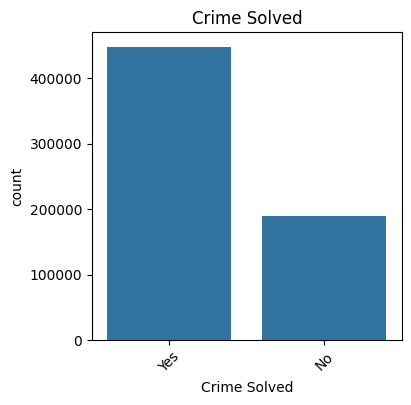

In [153]:
plt.figure(figsize=(4,4))
sns.countplot(data=crime, x="Crime Solved" )
plt.xticks(rotation=45)
plt.title('Crime Solved')
plt.show()

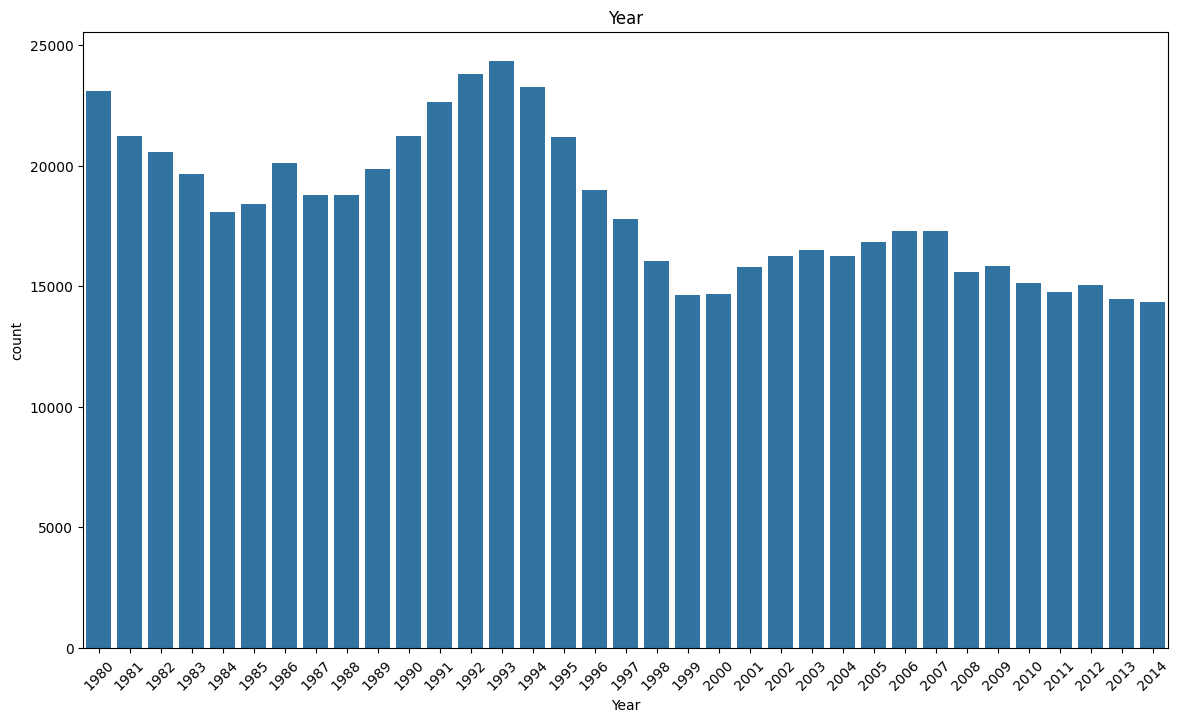

In [154]:
plt.figure(figsize=(14,8))
sns.countplot(data=crime, x="Year" )
plt.xticks(rotation=45)
plt.title('Year')
plt.show()

In [155]:
crime["Crime Solved"].value_counts()

Crime Solved
Yes    448172
No     190282
Name: count, dtype: int64

In [156]:
crime["Victim Age"].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83, 998,  81,  87,  80,   3,  12,
        94,  93,  92,  89,  97,  88,  91,  95,  98,  96])

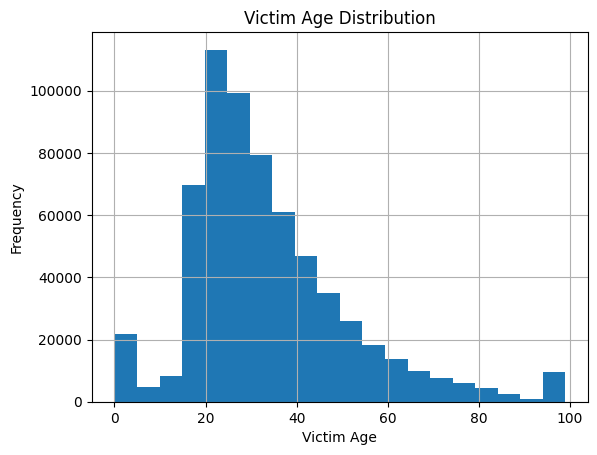

In [157]:
reasonable_ages = crime[(crime["Victim Age"] >= 0) & (crime["Victim Age"] <= 100)]
reasonable_ages["Victim Age"].hist(bins=20)
plt.title('Victim Age Distribution')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()

In [158]:
crime["Perpetrator Age"].unique()

array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

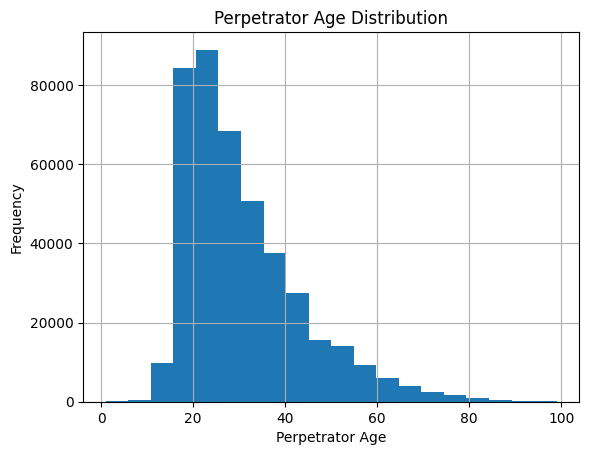

In [159]:
crime["Perpetrator Age"] = pd.to_numeric(crime["Perpetrator Age"], errors='coerce')
perpetrator_reasonable_ages = crime[(crime["Perpetrator Age"] > 0) & (crime["Perpetrator Age"] <= 100)]
perpetrator_reasonable_ages["Perpetrator Age"].hist(bins=20)
plt.title('Perpetrator Age Distribution')
plt.xlabel('Perpetrator Age')
plt.ylabel('Frequency')
plt.show()

In [160]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              638454 non-null  int64  
 1   Agency Code            638454 non-null  object 
 2   Agency Name            638454 non-null  object 
 3   Agency Type            638454 non-null  object 
 4   City                   638454 non-null  object 
 5   State                  638454 non-null  object 
 6   Year                   638454 non-null  int64  
 7   Month                  638454 non-null  object 
 8   Incident               638454 non-null  int64  
 9   Crime Type             638454 non-null  object 
 10  Crime Solved           638454 non-null  object 
 11  Victim Sex             638454 non-null  object 
 12  Victim Age             638454 non-null  int64  
 13  Victim Race            638454 non-null  object 
 14  Victim Ethnicity       638454 non-nu

In [161]:
crime.sample(8)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
584238,584239,GA04701,Albany,Municipal Police,Dougherty,Georgia,2011,October,2,Murder or Manslaughter,...,Unknown,Male,22.0,Black,Unknown,Unknown,Unknown,0,0,FBI
533003,533004,WA03400,Thurston,Sheriff,Thurston,Washington,2007,January,1,Murder or Manslaughter,...,Not Hispanic,Male,52.0,White,Not Hispanic,Acquaintance,Strangulation,0,0,FBI
609734,609735,VA12200,Richmond,Municipal Police,Richmond,Virginia,2013,July,1,Murder or Manslaughter,...,Unknown,Male,20.0,Black,Unknown,Unknown,Firearm,0,2,FBI
168652,168653,MI82349,Detroit,Municipal Police,Wayne,Michigan,1988,June,3,Murder or Manslaughter,...,Unknown,Male,34.0,Black,Unknown,Acquaintance,Knife,0,0,FBI
624738,624739,CA00109,Oakland,Municipal Police,Alameda,California,2014,October,11,Murder or Manslaughter,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
372471,372472,AZ00723,Phoenix,Municipal Police,Maricopa,Arizona,1998,February,17,Murder or Manslaughter,...,Not Hispanic,Male,45.0,White,Not Hispanic,Stranger,Handgun,0,0,FBI
285049,285050,OK07205,Tulsa,Municipal Police,Tulsa,Oklahoma,1993,October,6,Murder or Manslaughter,...,Not Hispanic,Male,33.0,White,Not Hispanic,Son,Blunt Object,0,1,FBI
594544,594545,WV00200,Berkeley,Sheriff,Berkeley,West Virginia,2011,September,1,Murder or Manslaughter,...,Unknown,Male,21.0,Black,Unknown,Stranger,Knife,0,0,FBI


## Correlation Tests(numerical) - spearman and Point-biserial correlation

In [162]:
numerical_crime=crime[["Year", "Incident", "Victim Age", "Perpetrator Age", "Perpetrator Count", "Victim Count", "Crime Solved"]]
numerical_crime["Crime Solved"] = numerical_crime["Crime Solved"].replace({'Yes': 1, 'No': 0}).astype(float)
numerical_crime.sample(9)

/var/folders/23/v45vdf3j7791ws_6xl_8l1hw0000gn/T/ipykernel_46454/1191111415.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_crime["Crime Solved"] = numerical_crime["Crime Solved"].replace({'Yes': 1, 'No': 0}).astype(float)
/var/folders/23/v45vdf3j7791ws_6xl_8l1hw0000gn/T/ipykernel_46454/1191111415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_crime["Crime Solved"] = numerical_crime["Crime Solved"].replace({'Yes': 1, 'No': 0}).astype(float)


,Year,Incident,Victim Age,Perpetrator Age,Perpetrator Count,Victim Count,Crime Solved
242636,1992,3,39,0.0,0,0,0.0
98872,1984,1,23,37.0,0,0,1.0
276896,1993,1,22,24.0,0,0,1.0
409629,2000,1,34,0.0,0,0,0.0
595679,2012,967,67,19.0,0,0,1.0
46247,1982,15,26,18.0,1,0,1.0
453080,2003,1,31,21.0,0,0,1.0
287956,1993,3,34,0.0,0,0,0.0
152972,1987,24,40,0.0,0,0,0.0


In [163]:
numerical_crime = numerical_crime.apply(pd.to_numeric, errors='coerce')
spearman_corr = numerical_crime.corr(method="spearman")
spearman_corr

,Year,Incident,Victim Age,Perpetrator Age,Perpetrator Count,Victim Count,Crime Solved
Year,1.000000,-0.033631,-0.018525,-0.039076,0.044722,0.040712,-0.028071
Incident,-0.033631,1.000000,-0.071390,-0.212263,0.018140,-0.046942,-0.169747
Victim Age,-0.018525,-0.071390,1.000000,0.168743,-0.043033,-0.028217,-0.011587
Perpetrator Age,-0.039076,-0.212263,0.168743,1.000000,0.005775,0.022447,0.757131
Perpetrator Count,0.044722,0.018140,-0.043033,0.005775,1.000000,0.084548,0.183330
Victim Count,0.040712,-0.046942,-0.028217,0.022447,0.084548,1.000000,0.015402
Crime Solved,-0.028071,-0.169747,-0.011587,0.757131,0.183330,0.015402,1.000000


In [164]:
numerical_crime.describe()

,Year,Incident,Victim Age,Perpetrator Age,Perpetrator Count,Victim Count,Crime Solved
count,638454.000000,638454.000000,638454.000000,638453.000000,638454.000000,638454.000000,638454.000000
mean,1995.801102,22.967924,35.033512,20.322697,0.185224,0.123334,0.701964
std,9.927693,92.149821,41.628306,17.886842,0.585496,0.537733,0.457396
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000,1.000000
75%,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000,1.000000
max,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000,1.000000


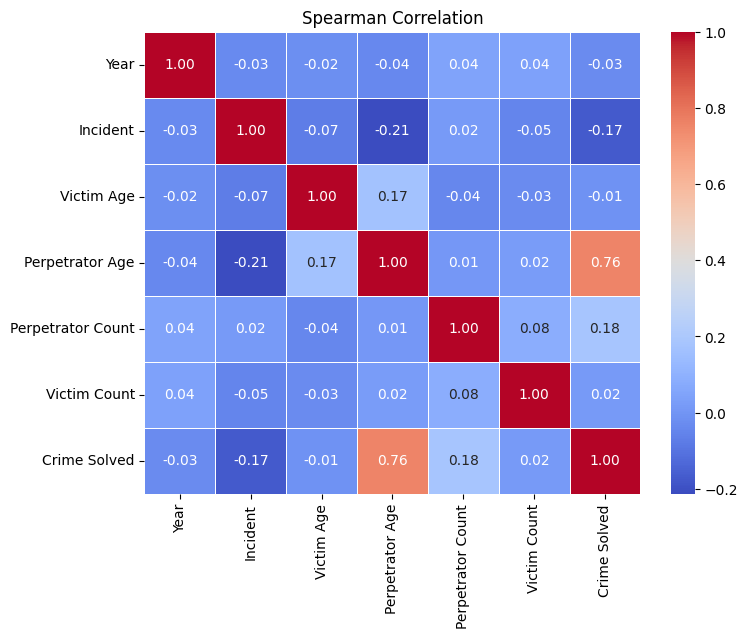

In [165]:
plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linecolor='white', linewidths=0.5)   
plt.title('Spearman Correlation')
plt.show()

### Point-biserial correlation

In [166]:
from scipy.stats import pearsonr
numerical_crime = numerical_crime.dropna()  # Remove rows with NaN values
numerical_crime = numerical_crime.replace([np.inf, -np.inf], np.nan).dropna() 
correlation, p_value = pearsonr(numerical_crime["Crime Solved"], numerical_crime["Perpetrator Age"])
print(f'Pearson Correlation: {correlation:.2f}, P-value: {p_value:.3f}')
print(f"P-value: {p_value:.3f}")


Pearson Correlation: 0.74, P-value: 0.000
P-value: 0.000


#### Findings 

- The correlation of 0.74 is a strong positive value, indicating that there is a significant positive relationship between the age of the perpetrator and whether a crime is solved. In practical terms, this could suggest that as 'Perpetrator Age' increases, so does the probability of 'Crime Solved' being 1 (meaning the crime is solved).
- The p-value effectively being 0 (or less than any conventional alpha level such as 0.01, 0.05, or 0.10) suggests that the correlation you observed is statistically significant. This means it's highly unlikely that this strong correlation is due to random chance in the sample of data.

## Categorical variables

### relationship between "Crime type" and "Weapon"

In [167]:
crosstab=pd.crosstab(crime["Crime Type"], crime["Weapon"])
crosstab

Weapon,Blunt Object,Drowning,Drugs,Explosives,Fall,Fire,Firearm,Gun,Handgun,Knife,Poison,Rifle,Shotgun,Strangulation,Suffocation,Unknown
Crime Type,,,,,,,,,,,,,,,,
Manslaughter by Negligence,681,211,304,18,9,212,466,34,3650,159,21,811,747,14,198,1581
Murder or Manslaughter,66656,993,1284,519,181,5961,46514,2172,313834,94803,433,22536,29975,8096,3770,31611


/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When 

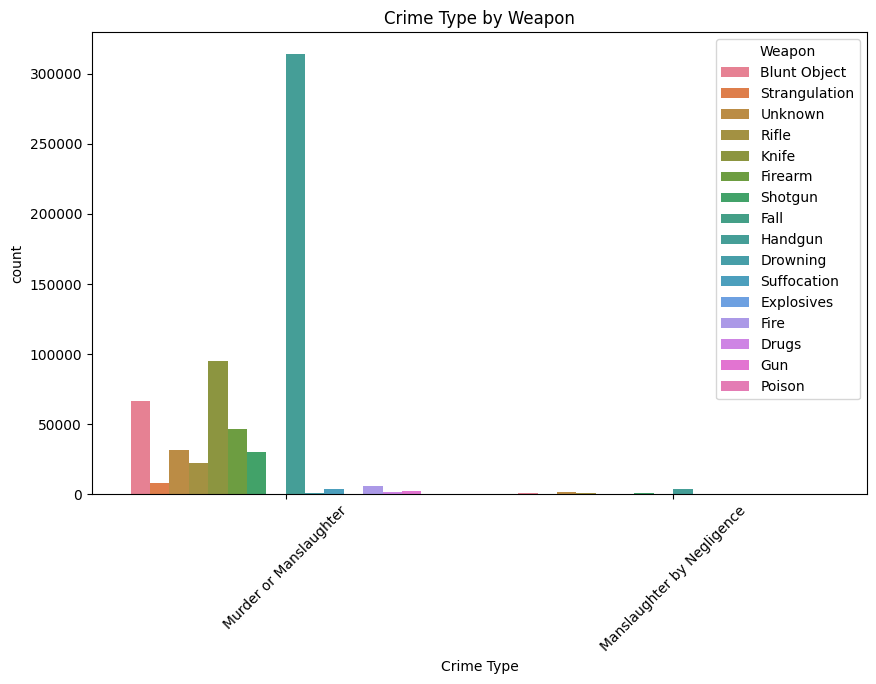

In [168]:
plt.figure(figsize=(10,6))
sns.countplot(data=crime, x="Crime Type", hue="Weapon")
plt.title('Crime Type by Weapon')
plt.xticks(rotation=45)
plt.show()

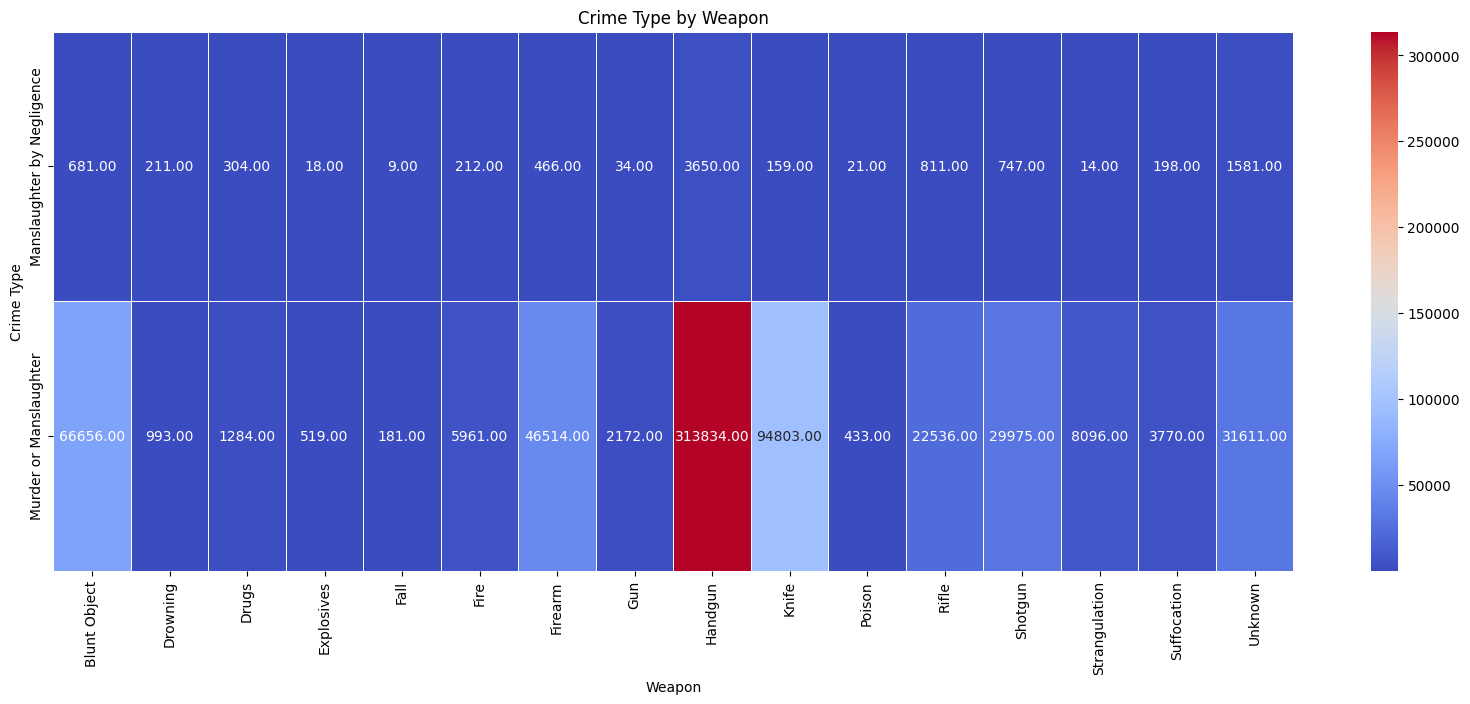

In [169]:
plt.figure(figsize=(20,7))
sns.heatmap(crosstab, annot=True, cmap="coolwarm", fmt=".2f", linecolor='white', linewidths=0.5)
plt.title('Crime Type by Weapon')
plt.show()

In [170]:
from scipy.stats import chi2_contingency   
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square Statistics: {chi2}, p-value: {p}")   

Chi-Square Statistics: 11375.490428495483, p-value: 0.0


In [171]:
crime.head(4)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI


### victim and perpetrator race

In [172]:
crosstab2=pd.crosstab(crime["Victim Race"], crime["Perpetrator Race"])
crosstab2

Perpetrator Race,Asian/Pacific Islander,Black,Native American/Alaska Native,Unknown,White
Victim Race,,,,,
Asian/Pacific Islander,3859,1249,34,3040,1708
Black,561,179258,191,102885,17004
Native American/Alaska Native,32,411,2006,960,1158
Unknown,62,963,21,4436,1194
White,1532,32635,1350,84726,197179


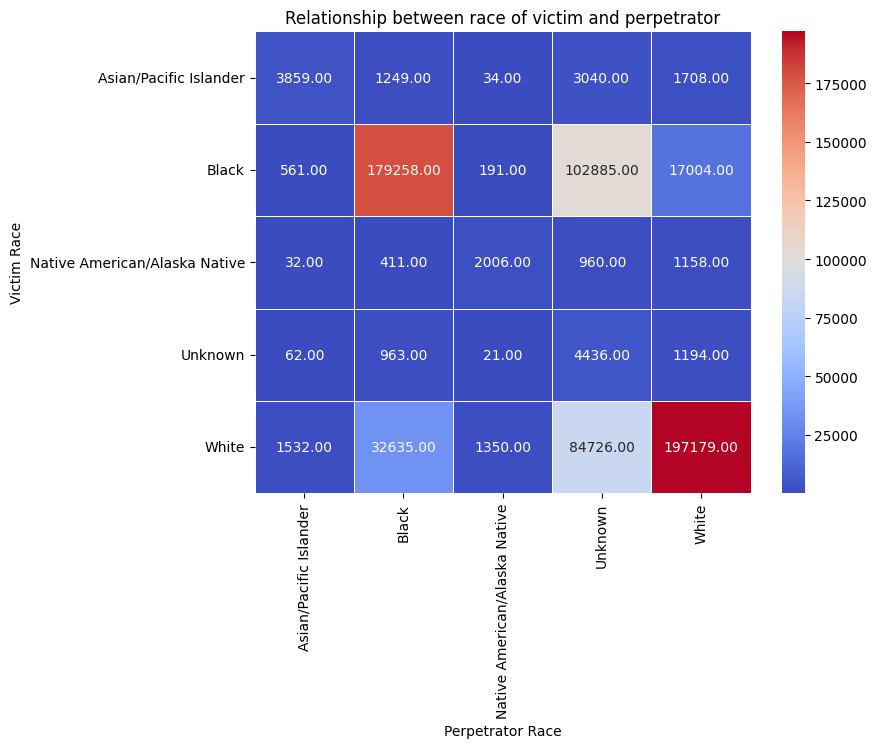

In [173]:
plt.figure(figsize=(8,6))
sns.heatmap(crosstab2, annot=True, cmap="coolwarm", fmt=".2f", linecolor='white', linewidths=0.5)
plt.title("Relationship between race of victim and perpetrator")
plt.show()

In [174]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab2)
print(f"Chi-Square Statistics: {chi2}, p-value: {p}")   

Chi-Square Statistics: 574039.1417841249, p-value: 0.0


### correlation between relationship and weapon

In [175]:
crosstab3=pd.crosstab(crime["Relationship"], crime["Weapon"])
crosstab3

Weapon,Blunt Object,Drowning,Drugs,Explosives,Fall,Fire,Firearm,Gun,Handgun,Knife,Poison,Rifle,Shotgun,Strangulation,Suffocation,Unknown
Relationship,,,,,,,,,,,,,,,,
Acquaintance,13681,135,373,55,53,965,4709,319,62674,24469,72,5636,8028,1196,447,3206
Boyfriend,222,0,33,5,2,42,135,13,2566,3595,5,195,263,20,11,195
Boyfriend/Girlfriend,231,4,4,0,0,8,19,0,344,573,5,24,35,74,15,47
Brother,400,9,10,10,2,63,191,21,2096,1446,0,485,642,14,17,108
Common-Law Husband,57,0,2,0,0,12,38,0,728,915,2,77,88,4,0,31
Common-Law Wife,370,3,2,1,2,20,70,4,1049,475,1,138,185,46,15,96
Daughter,2965,254,109,20,7,315,113,4,1119,428,44,137,184,130,545,1165
Employee,55,1,0,7,0,3,11,1,172,52,0,21,27,7,4,23
Employer,72,0,3,0,0,2,16,0,235,97,1,23,29,9,3,19


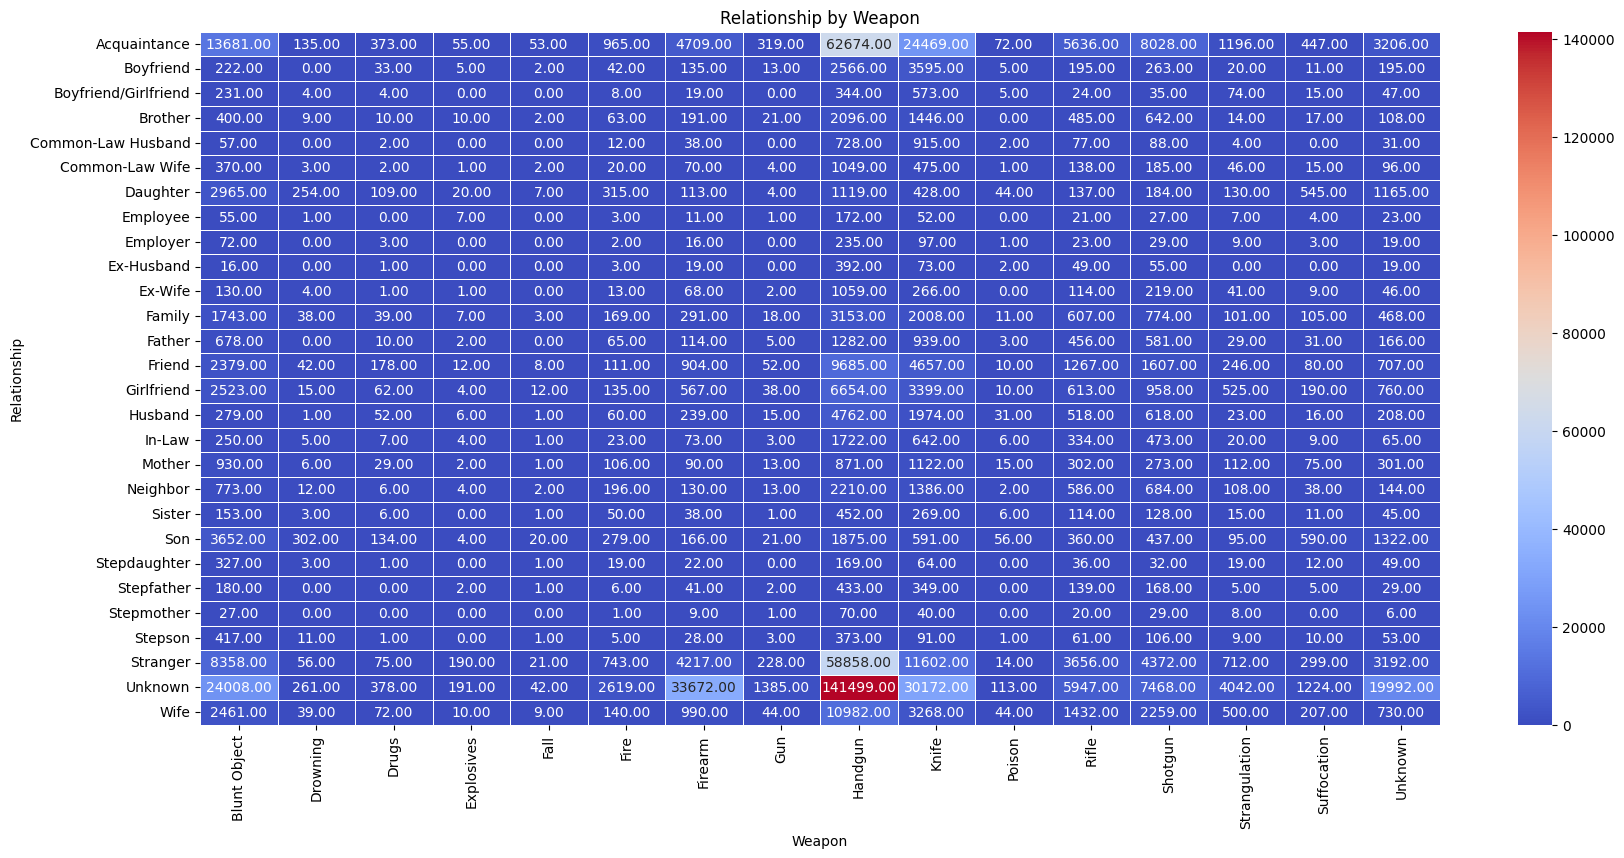

In [176]:
plt.figure(figsize=(20,9))
sns.heatmap(crosstab3, annot=True, cmap="coolwarm", fmt=".2f", linecolor='white', linewidths=0.5)
plt.title('Relationship by Weapon')
plt.show()

In [177]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab3)    
print(f"Chi-Square Statistics: {chi2}, p-value: {p}")

Chi-Square Statistics: 108831.533685482, p-value: 0.0


In [178]:
crime["Crime Solved"].value_counts()

Crime Solved
Yes    448172
No     190282
Name: count, dtype: int64

### correlation between "Crime Solved" and "Weapon"

In [179]:
crosstab4=pd.crosstab(crime["Crime Solved"], crime["Weapon"])
crosstab4

Weapon,Blunt Object,Drowning,Drugs,Explosives,Fall,Fire,Firearm,Gun,Handgun,Knife,Poison,Rifle,Shotgun,Strangulation,Suffocation,Unknown
Crime Solved,,,,,,,,,,,,,,,,
No,15833,205,192,149,24,2034,22578,882,100546,20204,78,3401,4682,3701,990,14783
Yes,51504,999,1396,388,166,4139,24402,1324,216938,74758,376,19946,26040,4409,2978,18409


In [180]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab4)
print(f"Chi-Square Statistics: {chi2}, p-value: {p}")


Chi-Square Statistics: 23285.30479301729, p-value: 0.0


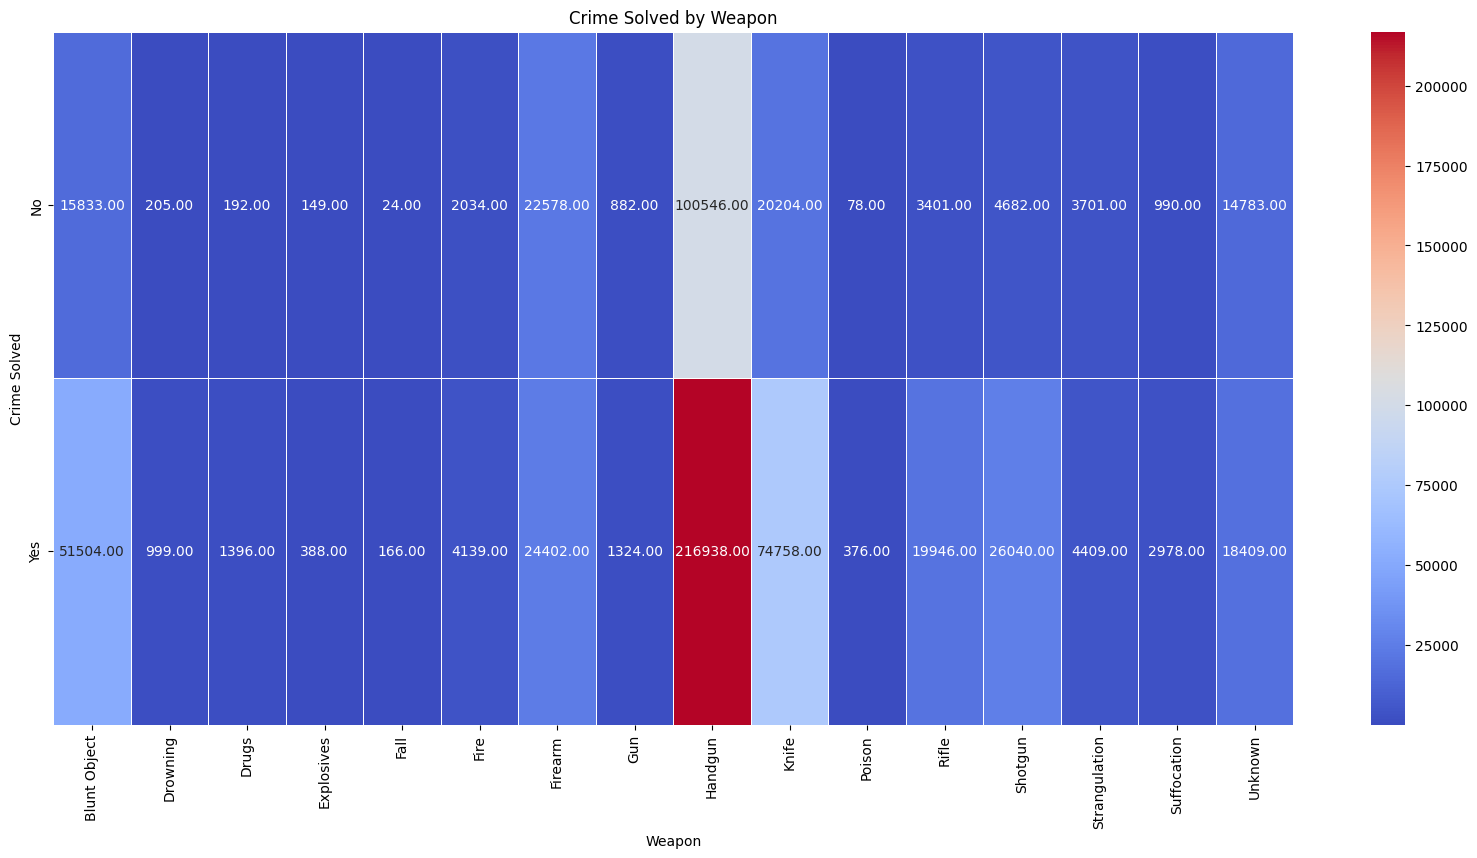

In [181]:
plt.figure(figsize=(20,9))
sns.heatmap(crosstab4, annot=True, cmap="coolwarm", fmt=".2f", linecolor='white', linewidths=0.5)
plt.title('Crime Solved by Weapon')
plt.show()

### Test for all categorical variables

In [182]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              638454 non-null  int64  
 1   Agency Code            638454 non-null  object 
 2   Agency Name            638454 non-null  object 
 3   Agency Type            638454 non-null  object 
 4   City                   638454 non-null  object 
 5   State                  638454 non-null  object 
 6   Year                   638454 non-null  int64  
 7   Month                  638454 non-null  object 
 8   Incident               638454 non-null  int64  
 9   Crime Type             638454 non-null  object 
 10  Crime Solved           638454 non-null  object 
 11  Victim Sex             638454 non-null  object 
 12  Victim Age             638454 non-null  int64  
 13  Victim Race            638454 non-null  object 
 14  Victim Ethnicity       638454 non-nu

In [183]:
from scipy.stats import chi2_contingency
import pandas as pd
from statsmodels.stats.multitest import multipletests

categorical_variables = ["Crime Type", "Crime Solved", "Victim Sex", "Perpetrator Sex", "Perpetrator Race", "Relationship", "Weapon", "City", "State","Agency Type"]

def chi_square_test_of_dependence(crime, categorical_variables):
    results = []
    for i, col1 in enumerate(categorical_variables):
        for j, col2 in enumerate(categorical_variables):
            if i < j:  
                contingency_table = pd.crosstab(crime[col1], crime[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                results.append([col1, col2, chi2, p])
    return results

results = chi_square_test_of_dependence(crime, categorical_variables)
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-Square Stat', 'P-Value'])

sorted_results = results_df.sort_values('P-Value')
print(sorted_results[['Variable 1', 'Variable 2', 'Chi-Square Stat', 'P-Value']])


          Variable 1        Variable 2  Chi-Square Stat        P-Value
0         Crime Type      Crime Solved     2.883835e+03   0.000000e+00
2         Crime Type   Perpetrator Sex     3.371896e+03   0.000000e+00
3         Crime Type  Perpetrator Race     5.048378e+03   0.000000e+00
4         Crime Type      Relationship     1.402782e+04   0.000000e+00
6         Crime Type              City     1.215268e+04   0.000000e+00
5         Crime Type            Weapon     1.137549e+04   0.000000e+00
7         Crime Type             State     5.719638e+03   0.000000e+00
9       Crime Solved        Victim Sex     4.565342e+03   0.000000e+00
14      Crime Solved              City     5.042366e+04   0.000000e+00
10      Crime Solved   Perpetrator Sex     6.374460e+05   0.000000e+00
11      Crime Solved  Perpetrator Race     6.090764e+05   0.000000e+00
12      Crime Solved      Relationship     2.888549e+05   0.000000e+00
15      Crime Solved             State     2.888129e+04   0.000000e+00
13    

In [184]:
pvals = results_df['P-Value'].values

# Benjamini-Hochberg correction
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')

results_df['FDR Corrected P-Value'] = pvals_corrected
results_df['Reject Null'] = reject

sorted_results_fdr = results_df.sort_values('FDR Corrected P-Value')

print(sorted_results_fdr[['Variable 1', 'Variable 2', 'Chi-Square Stat', 'P-Value', 'FDR Corrected P-Value', 'Reject Null']])

          Variable 1        Variable 2  Chi-Square Stat        P-Value  \
0         Crime Type      Crime Solved     2.883835e+03   0.000000e+00   
2         Crime Type   Perpetrator Sex     3.371896e+03   0.000000e+00   
3         Crime Type  Perpetrator Race     5.048378e+03   0.000000e+00   
4         Crime Type      Relationship     1.402782e+04   0.000000e+00   
6         Crime Type              City     1.215268e+04   0.000000e+00   
5         Crime Type            Weapon     1.137549e+04   0.000000e+00   
7         Crime Type             State     5.719638e+03   0.000000e+00   
9       Crime Solved        Victim Sex     4.565342e+03   0.000000e+00   
14      Crime Solved              City     5.042366e+04   0.000000e+00   
10      Crime Solved   Perpetrator Sex     6.374460e+05   0.000000e+00   
11      Crime Solved  Perpetrator Race     6.090764e+05   0.000000e+00   
12      Crime Solved      Relationship     2.888549e+05   0.000000e+00   
15      Crime Solved             State

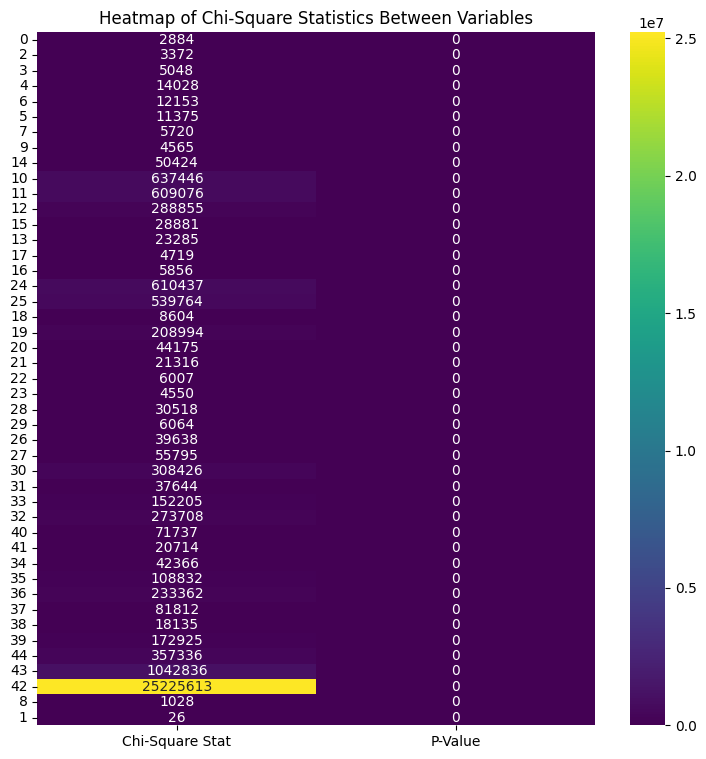

In [185]:
numeric_results = sorted_results.select_dtypes(include=[np.number])
plt.figure(figsize=(9, 9))
sns.heatmap(numeric_results, annot=True, fmt=".0f", cmap="viridis")
plt.title('Heatmap of Chi-Square Statistics Between Variables')
plt.show()

### Findings
- The highest Chi-Square statistics are observed in the combinations of "Crime Solved" with "Perpetrator Sex" and "Perpetrator Race", indicating very strong associations. This suggests that whether a crime is solved is highly dependent on the sex and race of the perpetrator, according to this dataset.

- The Chi-Square statistics show strong associations between "Crime Type" and variables such as "Relationship", "City", "Weapon", and "State". These results suggest that the nature of the crime is significantly related to these factors.

- There are strong associations between "Victim Sex" and "Perpetrator Sex", "Perpetrator Race", "Relationship", and "Weapon", highlighting significant dependencies between the characteristics of victims and perpetrators.

- The "City" and "State" variables have some of the highest Chi-Square values when paired with other variables, like "Agency Type" which has the highest Chi-Square statistic. This indicates a very strong relationship between the city and state where the crime occurs and the type of agency reporting the crime.

-  All P-values are zero or effectively zero (less than the floating-point precision of the dataset), indicating that all the associations mentioned are statistically significant, and the likelihood that these observed associations are due to random chance is extremely low.

- Some associations have smaller, yet still significant Chi-Square statistics, such as "Crime Type" with "Victim Sex". While significant, the strength of the association is not as pronounced as others.

- In summary, the data demonstrates statistically significant associations between various categorical factors related to crimes, with the strength of these associations varying greatly. The factors relating to the resolution of a crime (such as "Crime Solved"), demographic characteristics of perpetrators (like "Perpetrator Sex" and "Perpetrator Race"), and location ("City", "State", and "Agency Type") appear to have the strongest relationships.

- the inclusion of "City","State," and "Agency Type" in the categorical variables, can make it harder to interpret the results because they might reflect administrative or geographical patterns rather than informative associations that are useful for understanding crime characteristics.

### categorical variables "City","State," and "Agency Type" omitted

          Variable 1        Variable 2  Chi-Square Stat   P-Value
0         Crime Type      Crime Solved      2883.835075  0.000000
2         Crime Type   Perpetrator Sex      3371.895762  0.000000
3         Crime Type  Perpetrator Race      5048.378460  0.000000
4         Crime Type      Relationship     14027.815503  0.000000
6       Crime Solved        Victim Sex      4565.342121  0.000000
5         Crime Type            Weapon     11375.490428  0.000000
7       Crime Solved   Perpetrator Sex    637446.032464  0.000000
8       Crime Solved  Perpetrator Race    609076.353375  0.000000
12        Victim Sex  Perpetrator Race      8603.995646  0.000000
9       Crime Solved      Relationship    288854.875542  0.000000
10      Crime Solved            Weapon     23285.304793  0.000000
11        Victim Sex   Perpetrator Sex      4719.245775  0.000000
14        Victim Sex            Weapon     44175.324918  0.000000
13        Victim Sex      Relationship    208994.424515  0.000000
15   Perpe

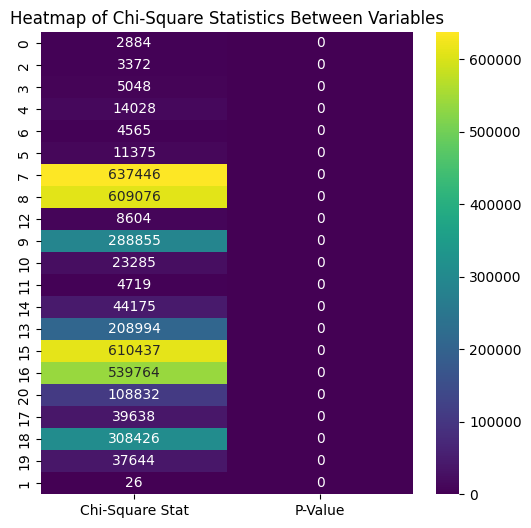

In [186]:
from scipy.stats import chi2_contingency
import pandas as pd
from statsmodels.stats.multitest import multipletests

categorical_variables = ["Crime Type", "Crime Solved", "Victim Sex", "Perpetrator Sex", "Perpetrator Race", "Relationship", "Weapon"]

def chi_square_test_of_dependence(crime, categorical_variables):
    results = []
    for i, col1 in enumerate(categorical_variables):
        for j, col2 in enumerate(categorical_variables):
            if i < j:  
                contingency_table = pd.crosstab(crime[col1], crime[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                results.append([col1, col2, chi2, p])
    return results

results = chi_square_test_of_dependence(crime, categorical_variables)
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-Square Stat', 'P-Value'])

sorted_results = results_df.sort_values('P-Value')
print(sorted_results[['Variable 1', 'Variable 2', 'Chi-Square Stat', 'P-Value']])

numeric_results = sorted_results.select_dtypes(include=[np.number])
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_results, annot=True, fmt=".0f", cmap="viridis")
plt.title('Heatmap of Chi-Square Statistics Between Variables')
plt.show()

### Findings

- The range of Chi-Square statistics is still broad but less extreme than when including the additional variables. The highest value is now in the hundreds of thousands, not tens of millions. 

- The strongest relationships involve "Perpetrator Sex" with both "Crime Solved" and "Perpetrator Race."

- There are also strong associations between "Victim Sex" and "Perpetrator Sex/Race" and between "Perpetrator Sex" and "Relationship."

- "Crime Type" has notable relationships with "Relationship," "Weapon," and other crime characteristics, but these are not as strong as those involving "Crime Solved."

- The Chi-Square statistic for "Crime Type" and "Victim Sex" is relatively small compared to others, which indicates a weaker association. However, the P-value is still very low, suggesting that the observed relationship is statistically significant but not as strong as others.

